<a href="https://colab.research.google.com/github/UshaSudulaguntla-11/ML/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

In [3]:
file=pd.read_csv("/content/tested.csv")
file

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
# 2. DATA CLEANING
# We drop rows where 'Survived' is missing because the model cannot learn without the answer
file = file.dropna(subset=['Survived'])

In [5]:
# We choose these columns because they logically affect survival (e.g., gender, class)
X = file[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = file['Survived']

In [6]:
# Converting 'Sex' to numbers because math models cannot process text like 'male'
X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})

# Filling empty 'Age' values with the median so we don't lose data rows
X['Age'] = X['Age'].fillna(X['Age'].median())

/tmp/ipython-input-1405099587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
/tmp/ipython-input-1405099587.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = X['Age'].fillna(X['Age'].median())


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [10]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [14]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

Accuracy: 100.00%


In [15]:
print(f"Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")

Error (MSE): 0.0000


In [23]:


sample = X_test.iloc[0:1]
prediction = model.predict(sample)

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Passenger: {sample_dict}")
print(f"Predicted Survival: {'Survived' if prediction[0] == 1 else 'Did Not Survive'}")


Sample Passenger: {'Pclass': 3.0, 'Sex': 1.0, 'Age': 25.0, 'SibSp': 0.0, 'Parch': 0.0, 'Fare': 7.2292}
Predicted Survival: Did Not Survive


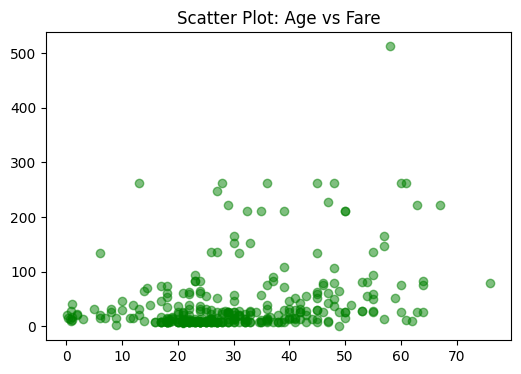

In [16]:
# WHY: To see if there is a direct relationship between two numerical variables (like Age and Fare)
plt.figure(figsize=(6,4))
plt.scatter(file["Age"], file["Fare"], alpha=0.5, color='green')
plt.title("Scatter Plot: Age vs Fare")
plt.show()


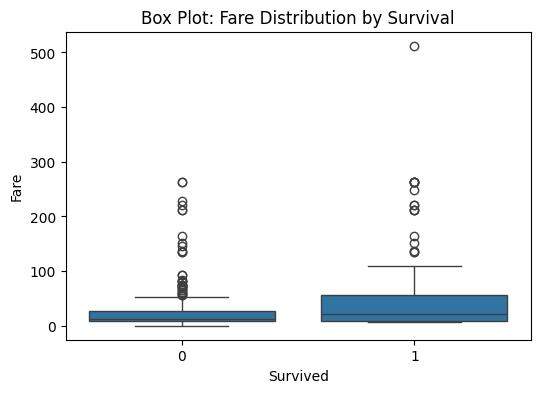

In [17]:
# PLOT 2: BOX PLOT (using Seaborn)
# WHY: To find 'Outliers' (extreme values) and see the spread of Fare for those who Survived vs Died
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Fare', data=file)
plt.title("Box Plot: Fare Distribution by Survival")
plt.show()

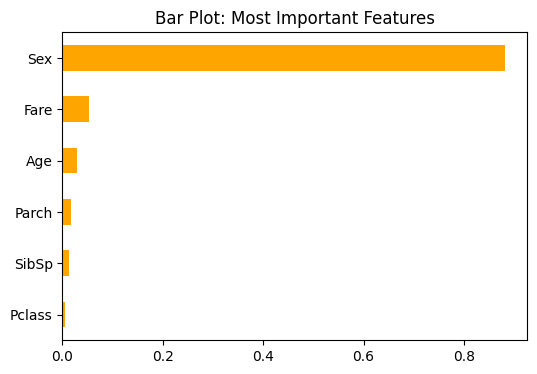

In [18]:
# PLOT 3: BAR PLOT (using Pandas/Matplotlib)
# WHY: To visualize 'Feature Importance'—showing which column (like Sex) helped the model the most
plt.figure(figsize=(6,4))
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='orange')
plt.title("Bar Plot: Most Important Features")
plt.show()

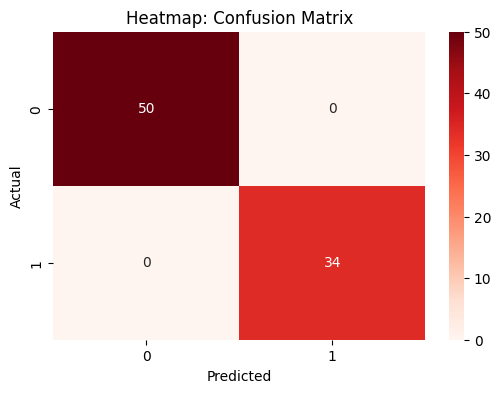

In [19]:
# PLOT 4: HEATMAP (using Seaborn)
# WHY: To show the 'Confusion Matrix'—a visual grid of where the model got it right vs wrong
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.title("Heatmap: Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

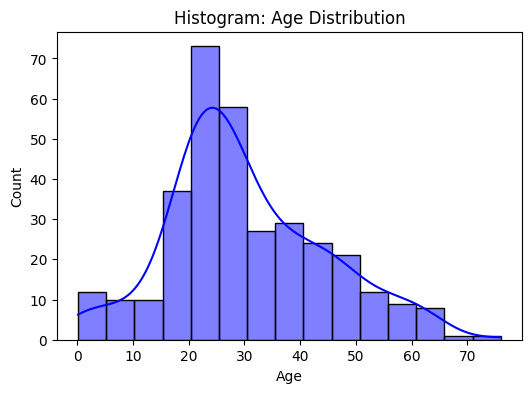

In [20]:
# PLOT 5: HISTOGRAM (using Seaborn)
# WHY: To see the 'Distribution'—finding out which age group was most common on the ship
plt.figure(figsize=(6,4))
sns.histplot(file['Age'], kde=True, color='blue')
plt.title("Histogram: Age Distribution")
plt.show()